# Izračuni

V tem zvezku bodo narejeni nekateri izračuni, povezani s cilji projektne naloge

In [1]:
import random
import matplotlib.pyplot as plt

# za 3D risanje
from mpl_toolkits.mplot3d import Axes3D 

from kvadrat import razdalja, Kvadrat, Kocka

# spreminjanje velikosti grafov
plt.rcParams['figure.figsize'] = [10, 10]    # če grafi preveliki, pomanjšaj ti dve števili

## Dolžina drevesa najkrajših poti

Kako se spreminja dolžina drevesa, ko spreminjamo število točk in največjo dovoljeno razdaljo?

In [2]:
def dolzina_drevesa_tocke(max_st_tock=50, max_razdalja=0.3):
    """
    Maksimalno dovoljeno razdaljo 'r' vzamemo za dano in pogledamo, 
    kako se spreminja skupna dolžina drevesa najkrajših poti, ko 
    imamo med eno in 'max_st_tock' točk.
    """
    # gradimo seznama točk in dolžin pri tem številu točk
    tocke = []    
    dolzine = []
    
    # pogledamo različna števila točk
    for i in range(1, max_st_tock + 1):
        a = Kvadrat(i, max_razdalja)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        tocke.append(i)
        
        dolzina = 0
        for ata in oce:
            if oce[ata] is not None:
                dolzina += razdalja(ata, oce[ata])
        
        dolzine.append(dolzina)
            
    return tocke, dolzine
    

CPU times: user 1min 10s, sys: 254 ms, total: 1min 10s
Wall time: 1min 11s


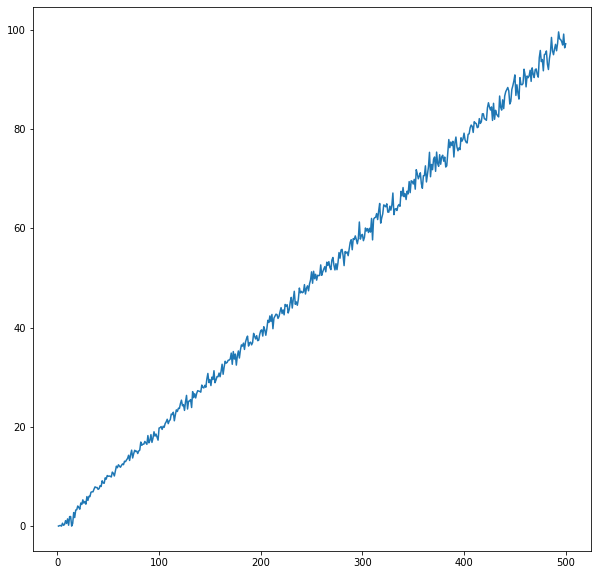

In [3]:
%%time
# narišemo dolžino v odvisnosti od števila točk

tocke, dolzine = dolzina_drevesa_tocke(500, 0.3)

plt.plot(tocke, dolzine);

CPU times: user 3.27 s, sys: 9.88 ms, total: 3.28 s
Wall time: 3.29 s


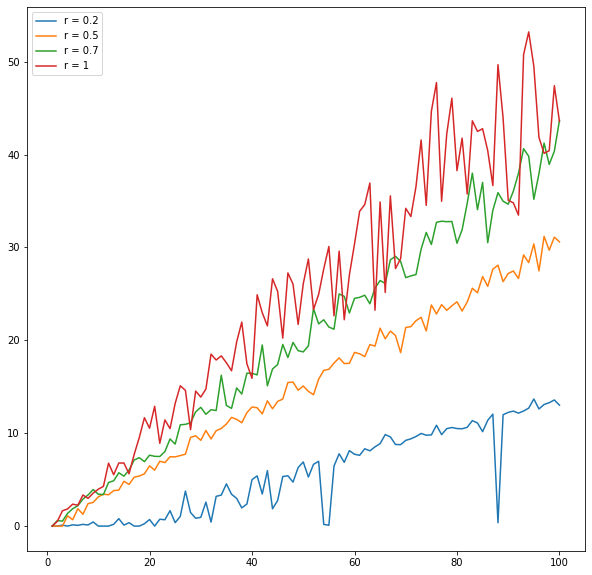

In [4]:
%%time
# izberemo nekaj možnih največjih razdalj in opazujemo, kaj se dogaja z dolžino drevesa

dolzine1_povp = []
dolzine2_povp = []
dolzine3_povp = []
dolzine4_povp = []

tocke1, dolzine1 = dolzina_drevesa_tocke(100, 0.2)
tocke2, dolzine2 = dolzina_drevesa_tocke(100, 0.5)
tocke3, dolzine3 = dolzina_drevesa_tocke(100, 0.7)
tocke4, dolzine4 = dolzina_drevesa_tocke(100, 1)

plt.plot(tocke1, dolzine1, label='r = 0.2');
plt.plot(tocke2, dolzine2, label='r = 0.5');
plt.plot(tocke3, dolzine3, label='r = 0.7');
plt.plot(tocke4, dolzine4, label='r = 1');
plt.legend();

CPU times: user 5min 24s, sys: 923 ms, total: 5min 25s
Wall time: 5min 27s


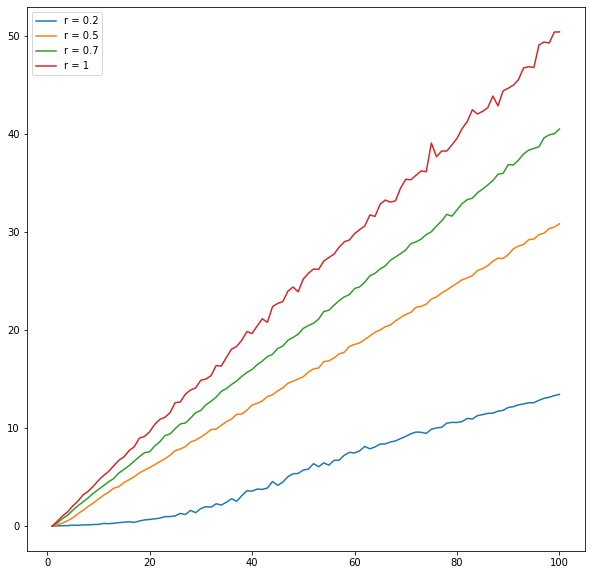

In [5]:
%%time

# v zgornjih izračunih smo opazili veliko šuma, zato ponovimo izračun 
# večkrat in povprečimo.

povp1 = []
povp2 = []
povp3 = []
povp4 = []

for i in range(100):
    tocke1, dolzine1 = dolzina_drevesa_tocke(100, 0.2)
    tocke2, dolzine2 = dolzina_drevesa_tocke(100, 0.5)
    tocke3, dolzine3 = dolzina_drevesa_tocke(100, 0.7)
    tocke4, dolzine4 = dolzina_drevesa_tocke(100, 1)
    
    # gradimo matriko vseh izračunov
    povp1.append(dolzine1)
    povp2.append(dolzine2)
    povp3.append(dolzine3)
    povp4.append(dolzine4)
    
# matriko povprečimo v en sam izračun
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  
povp4 = [sum(izracun)/len(izracun) for izracun in zip(*povp4)] 

# narišemo
plt.plot(tocke1, povp1, label='r = 0.2');
plt.plot(tocke2, povp2, label='r = 0.5');
plt.plot(tocke3, povp3, label='r = 0.7');
plt.plot(tocke4, povp4, label='r = 1');
plt.legend();

In [6]:
def dolzina_drevesa_razdalja(st_tock=100, najmanj=0.1, najvec=0.9, korak=0.005):
    """
    Vzamemo število točk za dano in gledamo, kako se spreminja skupna dolžina 
    drevesa najkrajših poti, ko spreminjamo največjo dovoljeno razdaljo od 
    'min_razdalja' do 'max_razdalja'.
    """
    # gradimo seznama točk in dolžin pri tem številu točk
    maxi = []    
    dolzine = []
    
    trenutna = najmanj
    
    while trenutna <= najvec:
        a = Kvadrat(st_tock, trenutna)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        maxi.append(trenutna)
        
        dolzina = 0
        for ata in oce:
            if oce[ata] is not None:
                dolzina += razdalja(ata, oce[ata])
        
        dolzine.append(dolzina)
        trenutna += korak
            
    return maxi, dolzine

CPU times: user 23.6 s, sys: 84.6 ms, total: 23.6 s
Wall time: 23.8 s


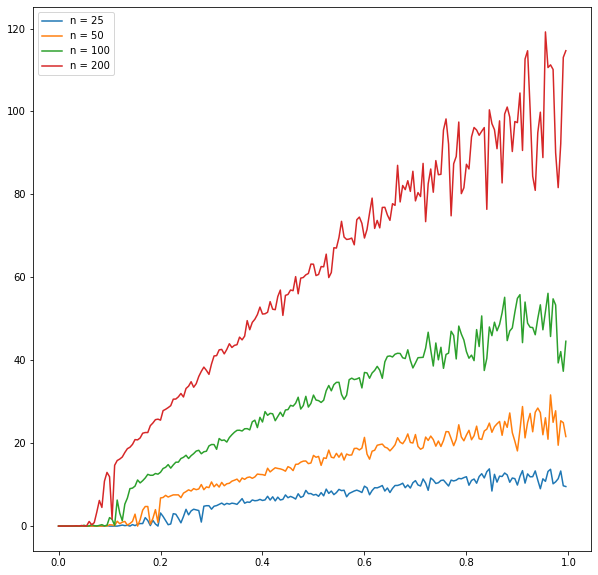

In [71]:
%%time

maxi0, dolzine0 = dolzina_drevesa_razdalja(25, 0, 1)
maxi1, dolzine1 = dolzina_drevesa_razdalja(50, 0, 1)
maxi2, dolzine2 = dolzina_drevesa_razdalja(100, 0, 1)
maxi3, dolzine3 = dolzina_drevesa_razdalja(200, 0, 1)

plt.plot(maxi0, dolzine0, label='n = 25');
plt.plot(maxi1, dolzine1, label='n = 50');
plt.plot(maxi2, dolzine2, label='n = 100');
plt.plot(maxi3, dolzine3, label='n = 200');
plt.legend();

CPU times: user 35.9 s, sys: 124 ms, total: 36 s
Wall time: 36.2 s


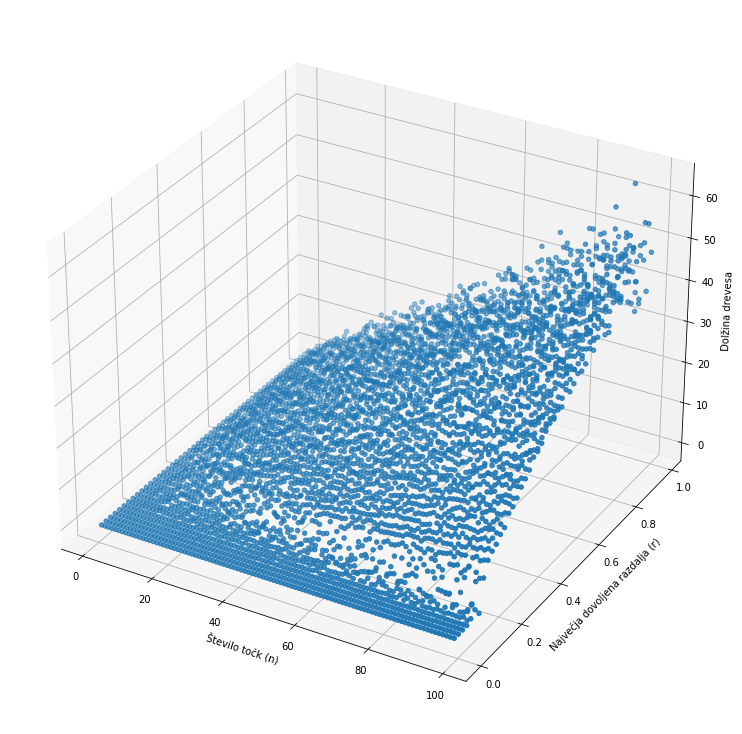

In [8]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

# definiramo prazne sezname - to bodo koordinate točk
nji = []
maxiji = []
dolzineji = []
korak = 0.02

# spreminjamo število točk in kličemo zgornjo funkcijo
for n in range(1, 100):
    
    # izračunamo dolžine
    
    maxi, dolzine = dolzina_drevesa_razdalja(n, 0, 1, korak)
    
    nji += [n for i in range(int(1/korak))]
    maxiji += maxi
    dolzineji += dolzine
    
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Dolžina drevesa')


ax.scatter(nji, maxiji, dolzineji);

CPU times: user 3min 55s, sys: 1.35 s, total: 3min 56s
Wall time: 3min 59s


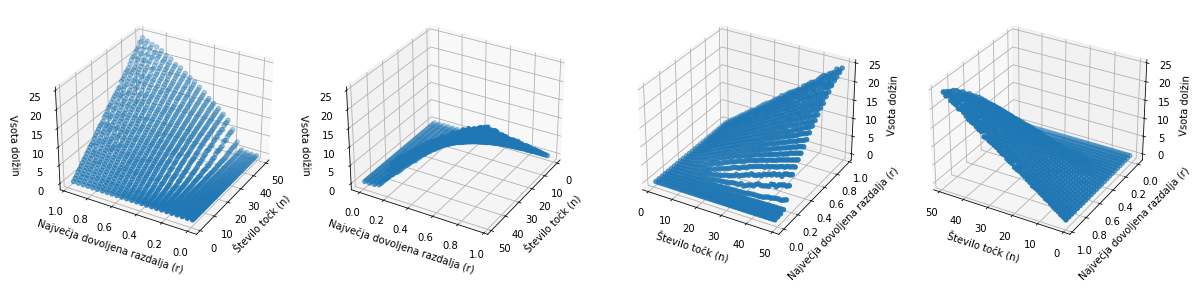

In [90]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

korak = 0.04

povp = []

# spreminjamo število točk in kličemo zgornjo funkcijo

for i in range(100):
    # definiramo prazne sezname - to bodo koordinate točk
    nji = []
    maxiji = []
    dolzineji = []
    for n in range(1, 50):
        
        # izračunamo dolžine
        
        maxi, dolzine = dolzina_drevesa_razdalja(n, 0, 1, korak)
        
        nji += [n for i in range(int(1/korak))]
        maxiji += maxi
        dolzineji += dolzine
    
    povp.append(dolzineji)
    
povp = [sum(izracun)/len(izracun) for izracun in zip(*povp)] 
    
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(20)

# s pomočjo funkcije subplot narišemo grafa enega ob drugem

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.view_init(30, 210)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.view_init(30, 30)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.view_init(30, 300)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.view_init(30, 120)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

## Vsota dolžin od korena do ostalih

Ponovno opazujemo ob spreminjanju števila točk in največje razdalje.

In [10]:
def vsota_razdalj_tocke(max_st_tock=50, max_razdalja=0.3):
    """
    Maksimalno dovoljeno razdaljo 'r' vzamemo za dano in pogledamo, 
    kako se spreminja vsota razdalj od korena do ostalih, ko 
    imamo med eno in 'max_st_tock' točk.
    """
    tocke = []
    vsote = []
    
    # pogledamo različna števila točk
    for i in range(1, max_st_tock + 1):
        a = Kvadrat(i, max_razdalja)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        tocke.append(i)
        
        dolzina = 0
        for tocka in oddaljenost:
            # to je naš pogoj povezanosti; 
            # 1000000 pomeni, da točki nista povezani
            if oddaljenost[tocka] < 1000000:
                dolzina += oddaljenost[tocka]
            
        vsote.append(dolzina)
            
    return tocke, vsote

 

CPU times: user 14.5 s, sys: 31.8 ms, total: 14.5 s
Wall time: 14.6 s


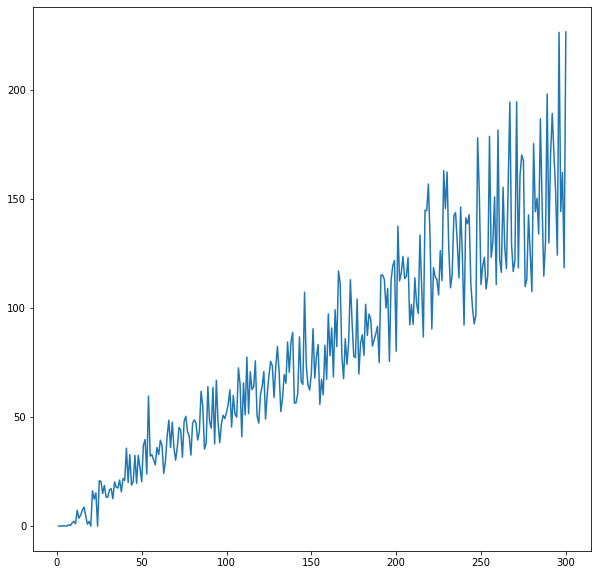

In [11]:
%%time

# narišemo vsoto v odvisnosti od števila točk

tocke, dolzine = vsota_razdalj_tocke(300, 0.3)

plt.plot(tocke, dolzine);

CPU times: user 3.37 s, sys: 16.6 ms, total: 3.38 s
Wall time: 3.4 s


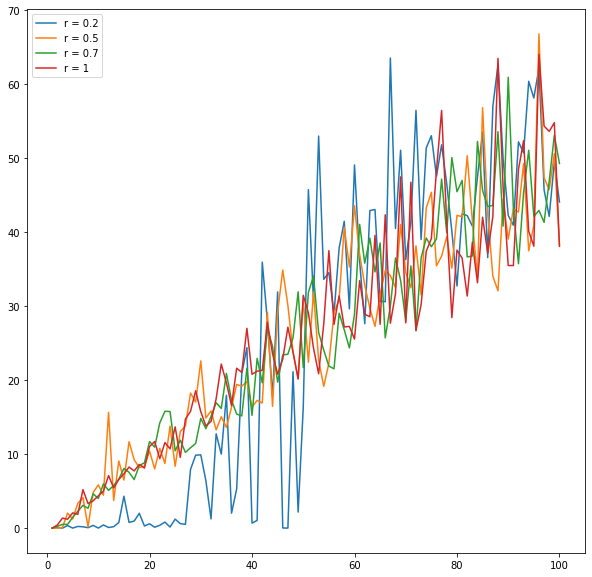

In [12]:
%%time

tocke1, dolzine1 = vsota_razdalj_tocke(100, 0.2)
tocke2, dolzine2 = vsota_razdalj_tocke(100, 0.5)
tocke3, dolzine3 = vsota_razdalj_tocke(100, 0.7)
tocke4, dolzine4 = vsota_razdalj_tocke(100, 1)

plt.plot(tocke1, dolzine1, label='r = 0.2');
plt.plot(tocke2, dolzine2, label='r = 0.5');
plt.plot(tocke3, dolzine3, label='r = 0.7');
plt.plot(tocke4, dolzine4, label='r = 1');
plt.legend();

CPU times: user 6min 7s, sys: 981 ms, total: 6min 8s
Wall time: 6min 9s


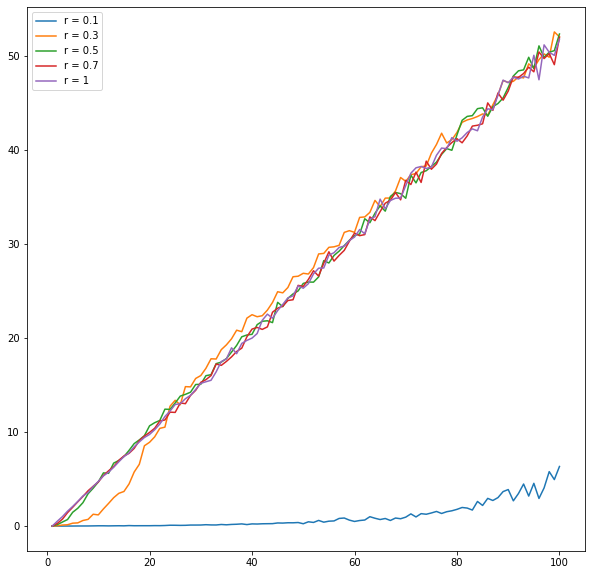

In [13]:
%%time

# v zgornjih izračunih smo opazili veliko šuma, zato ponovimo izračun 
# večkrat in povprečimo.

povp0 = []
povp1 = []
povp2 = []
povp3 = []
povp4 = []

for i in range(100):
    tocke0, dolzine0 = vsota_razdalj_tocke(100, 0.1)
    tocke1, dolzine1 = vsota_razdalj_tocke(100, 0.3)
    tocke2, dolzine2 = vsota_razdalj_tocke(100, 0.5)
    tocke3, dolzine3 = vsota_razdalj_tocke(100, 0.7)
    tocke4, dolzine4 = vsota_razdalj_tocke(100, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(dolzine0)
    povp1.append(dolzine1)
    povp2.append(dolzine2)
    povp3.append(dolzine3)
    povp4.append(dolzine4)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  
povp4 = [sum(izracun)/len(izracun) for izracun in zip(*povp4)] 

# narišemo
plt.plot(tocke0, povp0, label='r = 0.1');
plt.plot(tocke1, povp1, label='r = 0.3');
plt.plot(tocke2, povp2, label='r = 0.5');
plt.plot(tocke3, povp3, label='r = 0.7');
plt.plot(tocke4, povp4, label='r = 1');
plt.legend();

In [14]:
def vsota_razdalj_razdalja(st_tock=100, najmanj=0.1, najvec=0.9, korak=0.005):
    """
    Vzamemo število točk za dano in gledamo, kako se spreminja vsota razdalj,
    ko spreminjamo največjo dovoljeno razdaljo od 
    'min_razdalja' do 'max_razdalja'.
    """
    # gradimo seznama točk in dolžin pri tem številu točk
    maxi = []    
    vsote = []
    
    trenutna = najmanj
    
    while trenutna <= najvec:
        a = Kvadrat(st_tock, trenutna)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        vsota = 0
        for tocka in oddaljenost:
            # 1000000 pomeni, da točki nista povezani
            if oddaljenost[tocka] < 1000000:
                vsota += oddaljenost[tocka]
        
        vsote.append(vsota)
        maxi.append(trenutna)
        trenutna += korak
            
    return maxi, vsote

CPU times: user 18.5 s, sys: 41.9 ms, total: 18.6 s
Wall time: 18.6 s


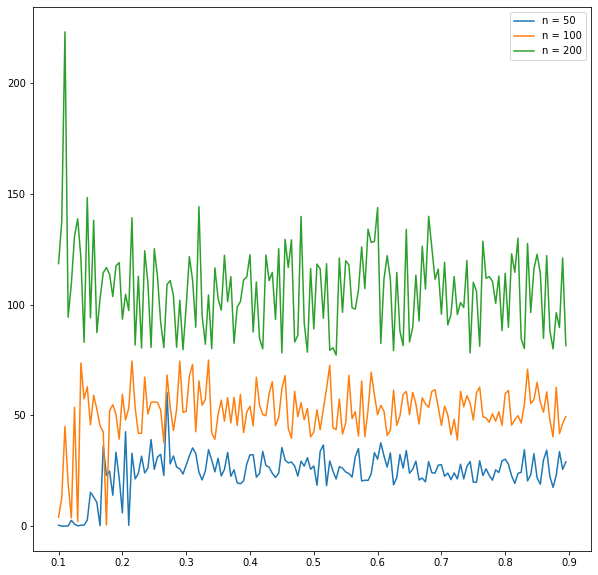

In [15]:
%%time

maxi1, dolzine1 = vsota_razdalj_razdalja(50)
maxi2, dolzine2 = vsota_razdalj_razdalja(100)
maxi3, dolzine3 = vsota_razdalj_razdalja(200)

plt.plot(maxi1, dolzine1, label='n = 50');
plt.plot(maxi2, dolzine2, label='n = 100');
plt.plot(maxi3, dolzine3, label='n = 200');
plt.legend();

CPU times: user 40min 14s, sys: 12.1 s, total: 40min 26s
Wall time: 40min 43s


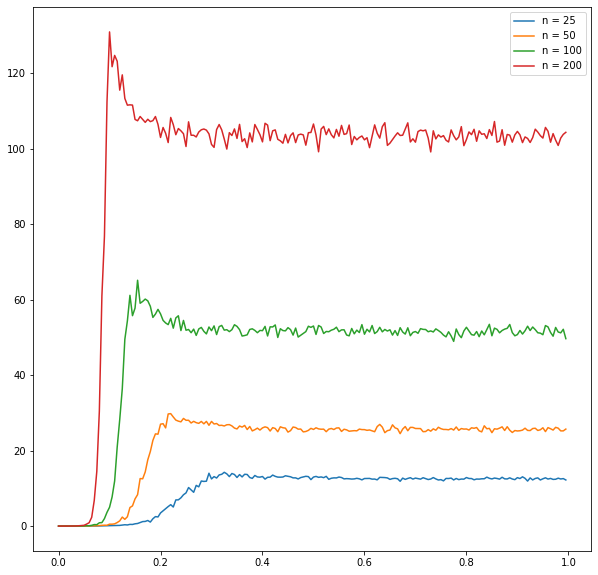

In [67]:
%%time

# v zgornjih izračunih smo opazili veliko šuma, zato ponovimo izračun 
# večkrat in povprečimo.

povp0 = []
povp1 = []
povp2 = []
povp3 = []

for i in range(100):
    
    tocke0, dolzine0 = vsota_razdalj_razdalja(25, 0, 1)
    tocke1, dolzine1 = vsota_razdalj_razdalja(50, 0, 1)
    tocke2, dolzine2 = vsota_razdalj_razdalja(100, 0, 1)
    tocke3, dolzine3 = vsota_razdalj_razdalja(200, 0, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(dolzine0)
    povp1.append(dolzine1)
    povp2.append(dolzine2)
    povp3.append(dolzine3)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  

# narišemo
plt.plot(tocke0, povp0, label='n = 25');
plt.plot(tocke1, povp1, label='n = 50');
plt.plot(tocke2, povp2, label='n = 100');
plt.plot(tocke3, povp3, label='n = 200');
plt.legend();

CPU times: user 1min 10s, sys: 151 ms, total: 1min 10s
Wall time: 1min 10s


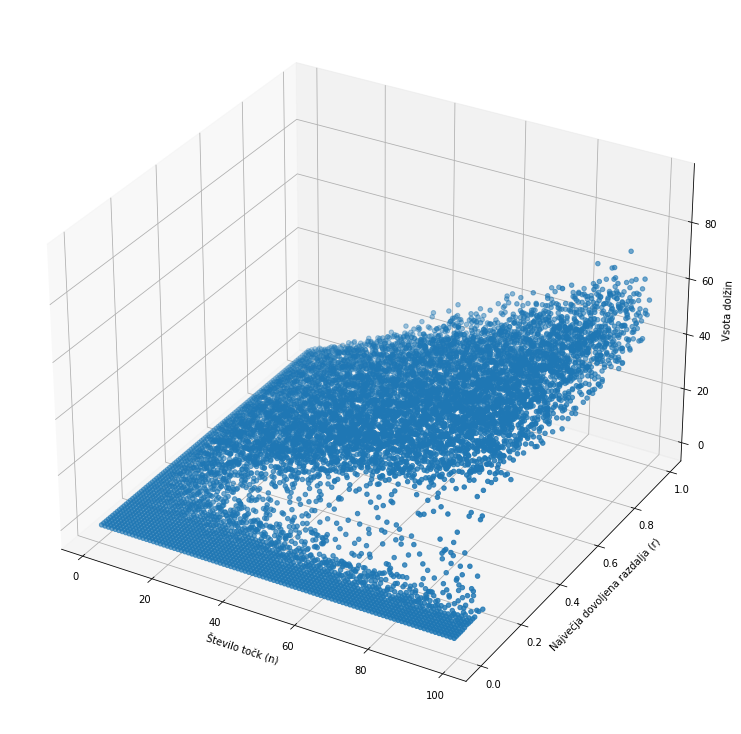

In [17]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

# definiramo prazne sezname - to bodo koordinate točk
nji = []
maxiji = []
dolzineji = []
korak = 0.01

# spreminjamo število točk in kličemo zgornjo funkcijo
for n in range(1, 100):
    
    # izračunamo dolžine
    
    maxi, dolzine = vsota_razdalj_razdalja(n, 0, 1, korak)
    
    nji += [n for i in range(int(1/korak))]
    maxiji += maxi
    dolzineji += dolzine
    
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')


ax.scatter(nji, maxiji, dolzineji);

CPU times: user 3min 46s, sys: 797 ms, total: 3min 47s
Wall time: 3min 48s


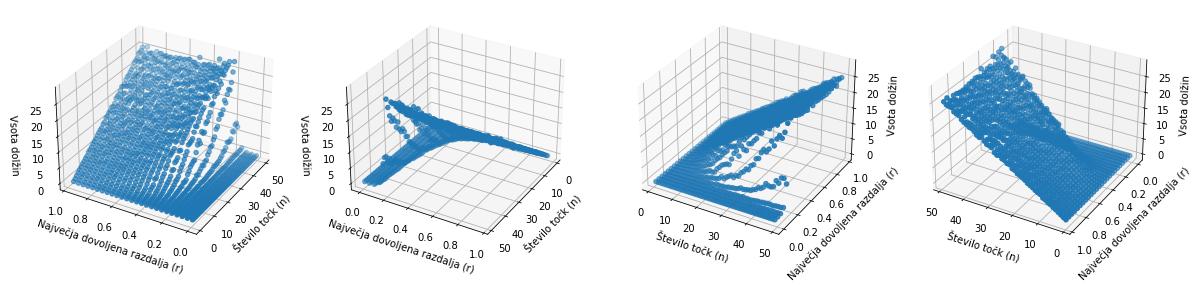

In [91]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

korak = 0.04

povp = []

# spreminjamo število točk in kličemo zgornjo funkcijo
for i in range(100):
    # definiramo prazne sezname - to bodo koordinate točk
    nji = []
    maxiji = []
    dolzineji = []
    for n in range(1, 50):
        
        # izračunamo dolžine
        
        maxi, dolzine = vsota_razdalj_razdalja(n, 0, 1, korak)
        
        nji += [n for i in range(int(1/korak))]
        maxiji += maxi
        dolzineji += dolzine
    
    povp.append(dolzineji)
    
povp = [sum(izracun)/len(izracun) for izracun in zip(*povp)] 
    
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(20)

# s pomočjo funkcije subplot narišemo grafa enega ob drugem

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.view_init(30, 210)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.view_init(30, 30)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.view_init(30, 300)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.view_init(30, 120)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

## Dolžina najdaljše poti

Gledamo kako se spreminja dolžina najdaljše poti v odvisnosti od n in r.
Lahko bi pričakovali, da se da dolžina z večanjem parametrov manjša, ampak je res temu tako?

In [19]:
def najdaljsa_pot_tocke(max_st_tock=50, max_razdalja=0.3):
    """
    Maksimalno dovoljeno razdaljo 'r' vzamemo za dano in pogledamo, 
    kako se spreminja dolžina najdaljše poti, ko 
    imamo med eno in 'max_st_tock' točk.
    """
    # gradimo seznama točk in dolžin pri tem številu točk
    tocke = []    
    dolzine = []
    
    # pogledamo različna števila točk
    for i in range(1, max_st_tock + 1):
        a = Kvadrat(i, max_razdalja)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        tocke.append(i)
        
        dolzina = 0    # da bo vedno definirano
        # če je oddaljenost 1000000, potem točki nista povezani
        if max(oddaljenost.values()) < 1000000:
            dolzina = max(oddaljenost.values())
        
        dolzine.append(dolzina)
            
    return tocke, dolzine

CPU times: user 1min 8s, sys: 208 ms, total: 1min 9s
Wall time: 1min 9s


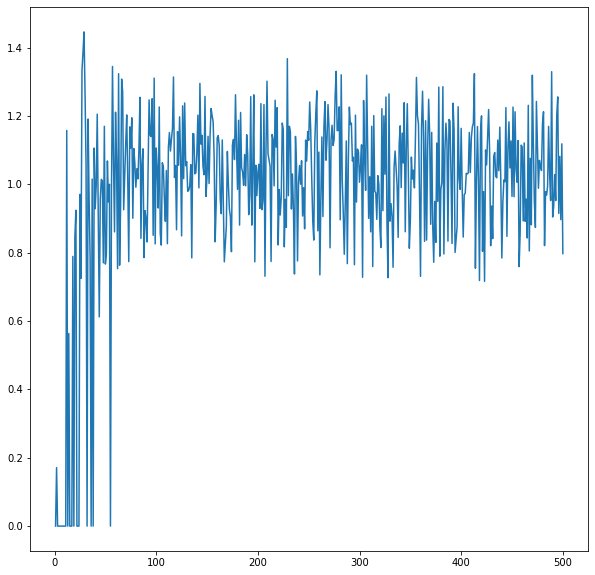

In [20]:
%%time

tocke, dolzine = najdaljsa_pot_tocke(500, 0.3)

plt.plot(tocke, dolzine);

CPU times: user 3.23 s, sys: 10.2 ms, total: 3.24 s
Wall time: 3.25 s


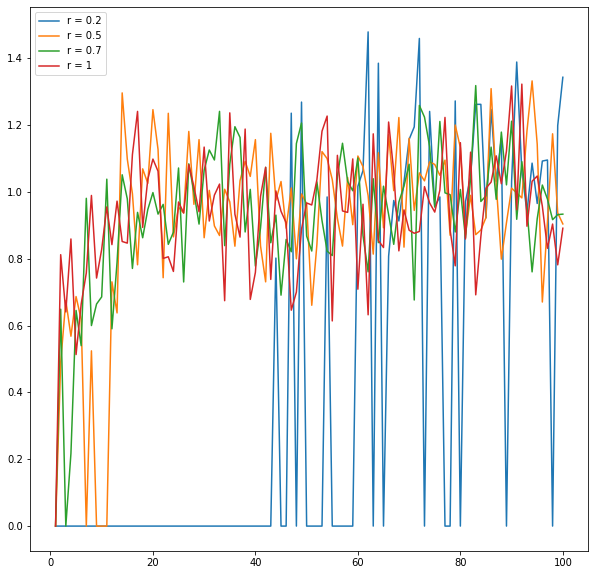

In [21]:
%%time

tocke1, dolzine1 = najdaljsa_pot_tocke(100, 0.2)
tocke2, dolzine2 = najdaljsa_pot_tocke(100, 0.5)
tocke3, dolzine3 = najdaljsa_pot_tocke(100, 0.7)
tocke4, dolzine4 = najdaljsa_pot_tocke(100, 1)

plt.plot(tocke1, dolzine1, label='r = 0.2');
plt.plot(tocke2, dolzine2, label='r = 0.5');
plt.plot(tocke3, dolzine3, label='r = 0.7');
plt.plot(tocke4, dolzine4, label='r = 1');
plt.legend();

CPU times: user 6min 8s, sys: 1.02 s, total: 6min 9s
Wall time: 6min 11s


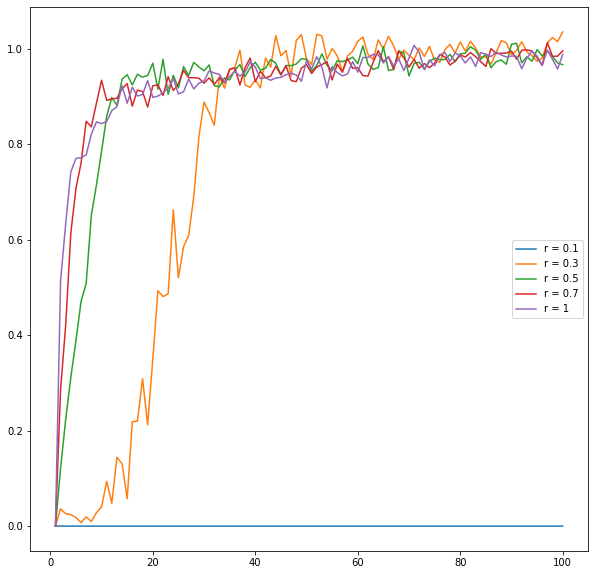

In [22]:
%%time

# v zgornjih izračunih smo opazili veliko šuma, zato ponovimo izračun 
# večkrat in povprečimo.

povp0 = []
povp1 = []
povp2 = []
povp3 = []
povp4 = []

for i in range(100):
    tocke0, dolzine0 = najdaljsa_pot_tocke(100, 0.1)
    tocke1, dolzine1 = najdaljsa_pot_tocke(100, 0.3)
    tocke2, dolzine2 = najdaljsa_pot_tocke(100, 0.5)
    tocke3, dolzine3 = najdaljsa_pot_tocke(100, 0.7)
    tocke4, dolzine4 = najdaljsa_pot_tocke(100, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(dolzine0)
    povp1.append(dolzine1)
    povp2.append(dolzine2)
    povp3.append(dolzine3)
    povp4.append(dolzine4)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  
povp4 = [sum(izracun)/len(izracun) for izracun in zip(*povp4)] 

# narišemo
plt.plot(tocke0, povp0, label='r = 0.1');
plt.plot(tocke1, povp1, label='r = 0.3');
plt.plot(tocke2, povp2, label='r = 0.5');
plt.plot(tocke3, povp3, label='r = 0.7');
plt.plot(tocke4, povp4, label='r = 1');
plt.legend();

In [23]:
def najdaljsa_pot_razdalja(st_tock=100, najmanj=0.1, najvec=0.9, korak=0.005):
    """
    Vzamemo število točk za dano in gledamo, kako se spreminja dolžina 
    najdaljše poti, ko spreminjamo največjo dovoljeno razdaljo od 
    'min_razdalja' do 'max_razdalja'.
    """
    # gradimo seznama točk in dolžin pri tem številu točk
    maxi = []    
    dolzine = []
    
    trenutna = najmanj
    
    while trenutna <= najvec:
        a = Kvadrat(st_tock, trenutna)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        maxi.append(trenutna)
        
        #postavimo na 0, da bo vedno definirano
        dolzina = 0
        
        # 1000000 pomeni, da točki nista povezani
        kandidati = [x for x in oddaljenost.values() if x < 1000000]
        
        if len(kandidati) > 0:
            dolzina = max(kandidati)

        dolzine.append(dolzina)
        trenutna += korak
            
    return maxi, dolzine

CPU times: user 18.4 s, sys: 37.2 ms, total: 18.4 s
Wall time: 18.4 s


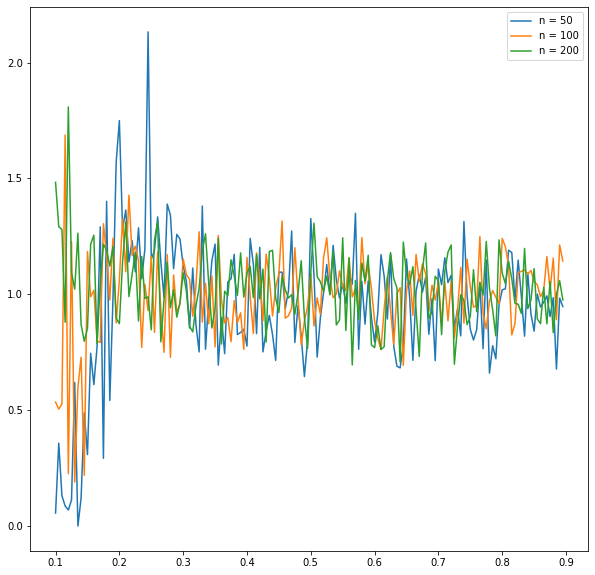

In [24]:
%%time

maxi1, dolzine1 = najdaljsa_pot_razdalja(50)
maxi2, dolzine2 = najdaljsa_pot_razdalja(100)
maxi3, dolzine3 = najdaljsa_pot_razdalja(200)

plt.plot(maxi1, dolzine1, label='n = 50');
plt.plot(maxi2, dolzine2, label='n = 100');
plt.plot(maxi3, dolzine3, label='n = 200');
plt.legend();

CPU times: user 40min, sys: 14 s, total: 40min 14s
Wall time: 40min 37s


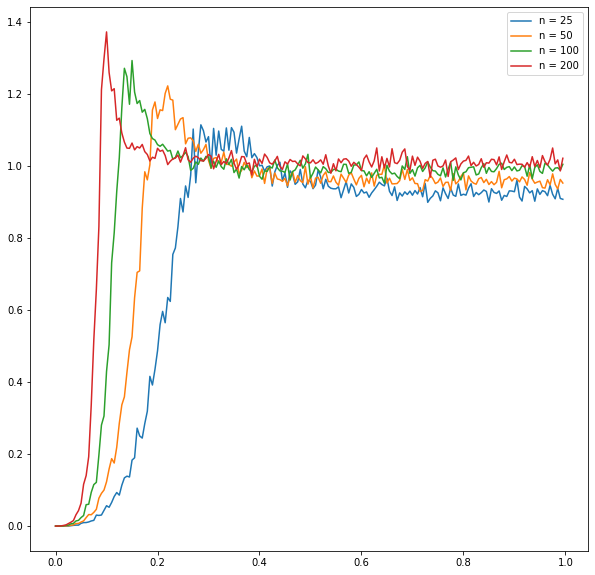

In [66]:
%%time

# v zgornjih izračunih smo opazili veliko šuma, zato ponovimo izračun 
# večkrat in povprečimo.

povp0 = []
povp1 = []
povp2 = []
povp3 = []

for i in range(100):
    tocke0, dolzine0 = najdaljsa_pot_razdalja(25, 0, 1)
    tocke1, dolzine1 = najdaljsa_pot_razdalja(50, 0, 1)
    tocke2, dolzine2 = najdaljsa_pot_razdalja(100, 0, 1)
    tocke3, dolzine3 = najdaljsa_pot_razdalja(200, 0, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(dolzine0)
    povp1.append(dolzine1)
    povp2.append(dolzine2)
    povp3.append(dolzine3)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  

# narišemo
plt.plot(tocke0, povp0, label='n = 25');
plt.plot(tocke1, povp1, label='n = 50');
plt.plot(tocke2, povp2, label='n = 100');
plt.plot(tocke3, povp3, label='n = 200');
plt.legend();

CPU times: user 2min 21s, sys: 365 ms, total: 2min 22s
Wall time: 2min 22s


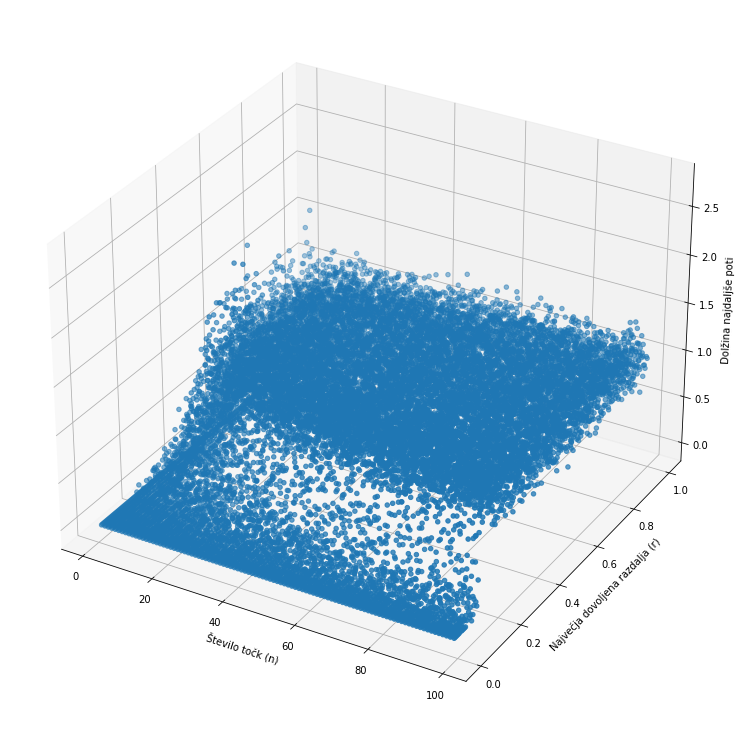

In [53]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

# definiramo prazne sezname - to bodo koordinate točk
nji = []
maxiji = []
dolzineji = []
korak = 0.005

# spreminjamo število točk in kličemo zgornjo funkcijo
for n in range(1, 100):
    
    # izračunamo dolžine
    
    maxi, dolzine = najdaljsa_pot_razdalja(n, 0, 1, korak)
    
    nji += [n for i in range(int(1/korak))]
    maxiji += maxi
    dolzineji += dolzine
    
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Dolžina najdaljše poti')


ax.scatter(nji, maxiji, dolzineji);

CPU times: user 3min 46s, sys: 773 ms, total: 3min 46s
Wall time: 3min 48s


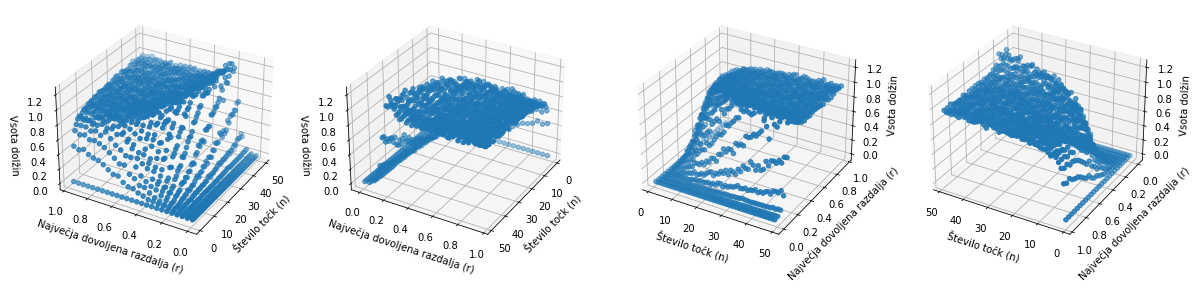

In [92]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

korak = 0.04

povp = []

# spreminjamo število točk in kličemo zgornjo funkcijo
for i in range(100):
    # definiramo prazne sezname - to bodo koordinate točk
    nji = []
    maxiji = []
    dolzineji = []
    for n in range(1, 50):
        
        # izračunamo dolžine
        
        maxi, dolzine = najdaljsa_pot_razdalja(n, 0, 1, korak)
        
        nji += [n for i in range(int(1/korak))]
        maxiji += maxi
        dolzineji += dolzine
        
    povp.append(dolzineji)
    
povp = [sum(izracun)/len(izracun) for izracun in zip(*povp)] 
    
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(20)

# s pomočjo funkcije subplot narišemo grafa enega ob drugem

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.view_init(30, 210)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.view_init(30, 30)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.view_init(30, 300)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.view_init(30, 120)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

## Dolžina najkrajše poti

Gledamo kako se spreminja dolžina najkrajše poti v odvisnosti od n in r.
Lahko bi pričakovali, da se da dolžina z večanjem parametrov manjša, ampak je res temu tako?

In [28]:
def najkrajsa_pot_tocke(max_st_tock=50, max_razdalja=0.3):
    """
    Maksimalno dovoljeno razdaljo 'r' vzamemo za dano in pogledamo, 
    kako se spreminja dolžina najkrajše poti, ko 
    imamo med eno in 'max_st_tock' točk.
    """
    # gradimo seznama točk in dolžin pri tem številu točk
    tocke = []    
    dolzine = []
    
    # pogledamo različna števila točk
    for i in range(1, max_st_tock + 1):
        a = Kvadrat(i, max_razdalja)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        tocke.append(i)
        
        kandidati = [x for x in oddaljenost.values() if x > 0]
        #postavimo na 0, da bo vedno definirano
        minimalna = 0
        if (len(kandidati) > 0) and (min(kandidati) < 1000000):
            minimalna = min(kandidati)
        
        dolzine.append(minimalna)
            
    return tocke, dolzine

CPU times: user 3.41 s, sys: 21.1 ms, total: 3.44 s
Wall time: 3.46 s


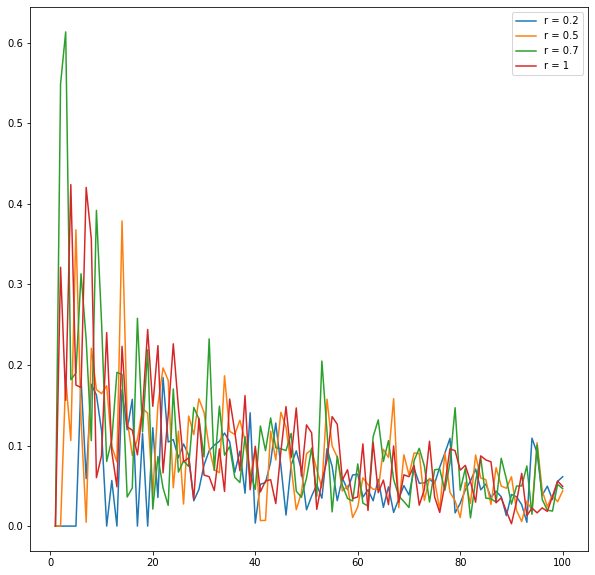

In [29]:
%%time

tocke1, dolzine1 = najkrajsa_pot_tocke(100, 0.2)
tocke2, dolzine2 = najkrajsa_pot_tocke(100, 0.5)
tocke3, dolzine3 = najkrajsa_pot_tocke(100, 0.7)
tocke4, dolzine4 = najkrajsa_pot_tocke(100, 1)

plt.plot(tocke1, dolzine1, label='r = 0.2');
plt.plot(tocke2, dolzine2, label='r = 0.5');
plt.plot(tocke3, dolzine3, label='r = 0.7');
plt.plot(tocke4, dolzine4, label='r = 1');
plt.legend();

CPU times: user 6min 8s, sys: 1.03 s, total: 6min 9s
Wall time: 6min 11s


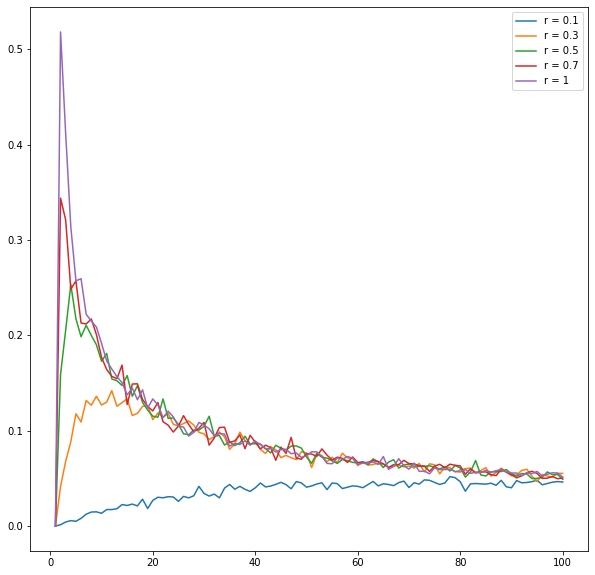

In [30]:
%%time

# v zgornjih izračunih smo opazili veliko šuma, zato ponovimo izračun 
# večkrat in povprečimo.

povp0 = []
povp1 = []
povp2 = []
povp3 = []
povp4 = []

for i in range(100):
    tocke0, dolzine0 = najkrajsa_pot_tocke(100, 0.1)
    tocke1, dolzine1 = najkrajsa_pot_tocke(100, 0.3)
    tocke2, dolzine2 = najkrajsa_pot_tocke(100, 0.5)
    tocke3, dolzine3 = najkrajsa_pot_tocke(100, 0.7)
    tocke4, dolzine4 = najkrajsa_pot_tocke(100, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(dolzine0)
    povp1.append(dolzine1)
    povp2.append(dolzine2)
    povp3.append(dolzine3)
    povp4.append(dolzine4)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  
povp4 = [sum(izracun)/len(izracun) for izracun in zip(*povp4)] 

# narišemo
plt.plot(tocke0, povp0, label='r = 0.1');
plt.plot(tocke1, povp1, label='r = 0.3');
plt.plot(tocke2, povp2, label='r = 0.5');
plt.plot(tocke3, povp3, label='r = 0.7');
plt.plot(tocke4, povp4, label='r = 1');
plt.legend();

In [54]:
def najkrajsa_pot_razdalja(st_tock=100, najmanj=0.1, najvec=0.9, korak=0.005):
    """
    Vzamemo število točk za dano in gledamo, kako se spreminja dolžina 
    najkrajše poti, ko spreminjamo največjo dovoljeno razdaljo od 
    'min_razdalja' do 'max_razdalja'.
    """
    # gradimo seznama točk in dolžin pri tem številu točk
    maxi = []    
    dolzine = []
    
    trenutna = najmanj
    
    while trenutna <= najvec:
        a = Kvadrat(st_tock, trenutna)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        maxi.append(trenutna)
        
        kandidati = [x for x in oddaljenost.values() if x > 0]
        #postavimo na 0, da bo vedno definirano
        minimalna = 0
        if (len(kandidati) > 0) and (min(kandidati) < 1000000):
            minimalna = min(kandidati)
        
        dolzine.append(minimalna)
        
        trenutna += korak
            
    return maxi, dolzine

CPU times: user 18.5 s, sys: 57.8 ms, total: 18.5 s
Wall time: 18.6 s


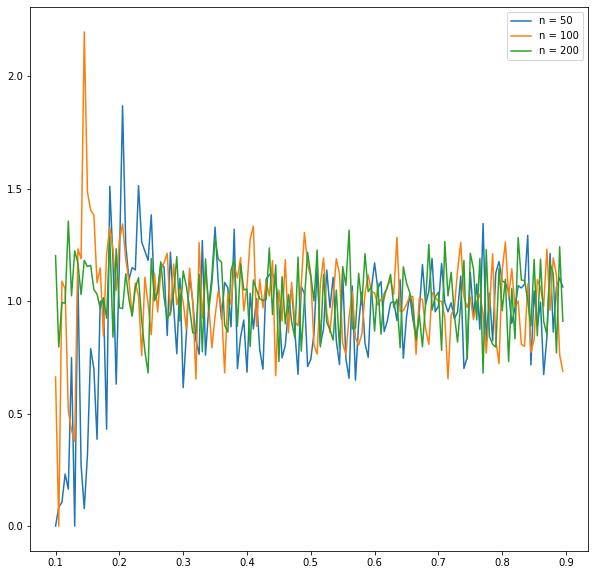

In [55]:
%%time

maxi1, dolzine1 = najdaljsa_pot_razdalja(50)
maxi2, dolzine2 = najdaljsa_pot_razdalja(100)
maxi3, dolzine3 = najdaljsa_pot_razdalja(200)

plt.plot(maxi1, dolzine1, label='n = 50');
plt.plot(maxi2, dolzine2, label='n = 100');
plt.plot(maxi3, dolzine3, label='n = 200');
plt.legend();

CPU times: user 38min 14s, sys: 7.03 s, total: 38min 21s
Wall time: 38min 31s


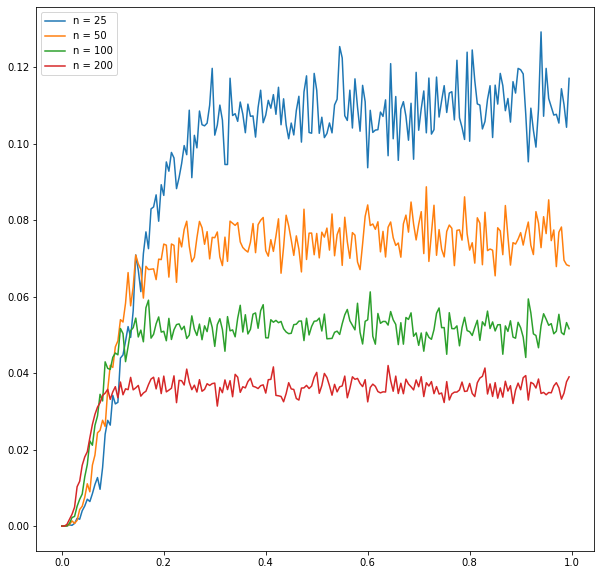

In [70]:
%%time

# v zgornjih izračunih smo opazili veliko šuma, zato ponovimo izračun 
# večkrat in povprečimo.

povp0 = []
povp1 = []
povp2 = []
povp3 = []

for i in range(100):
    tocke0, dolzine0 = najkrajsa_pot_razdalja(25, 0, 1)
    tocke1, dolzine1 = najkrajsa_pot_razdalja(50, 0, 1)
    tocke2, dolzine2 = najkrajsa_pot_razdalja(100, 0, 1)
    tocke3, dolzine3 = najkrajsa_pot_razdalja(200, 0, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(dolzine0)
    povp1.append(dolzine1)
    povp2.append(dolzine2)
    povp3.append(dolzine3)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  

# narišemo
plt.plot(tocke0, povp0, label='n = 25');
plt.plot(tocke1, povp1, label='n = 50');
plt.plot(tocke2, povp2, label='n = 100');
plt.plot(tocke3, povp3, label='n = 200');
plt.legend();

CPU times: user 2min 21s, sys: 336 ms, total: 2min 22s
Wall time: 2min 22s


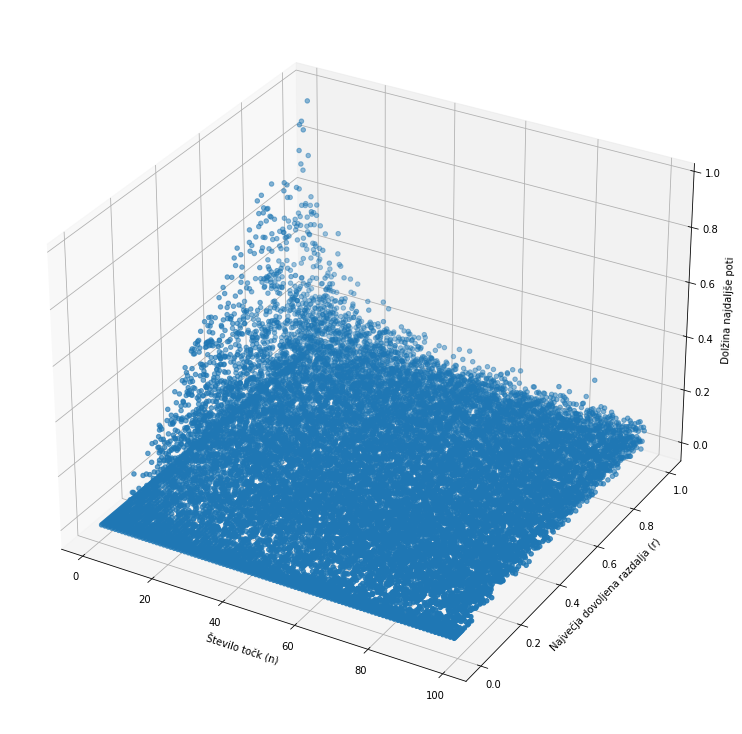

In [57]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

# definiramo prazne sezname - to bodo koordinate točk
nji = []
maxiji = []
dolzineji = []
korak = 0.005

# spreminjamo število točk in kličemo zgornjo funkcijo
for n in range(1, 100):
    
    # izračunamo dolžine
    
    maxi, dolzine = najkrajsa_pot_razdalja(n, 0, 1, korak)
    
    nji += [n for i in range(int(1/korak))]
    maxiji += maxi
    dolzineji += dolzine
    
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Dolžina najdaljše poti')


ax.scatter(nji, maxiji, dolzineji);

CPU times: user 3min 49s, sys: 955 ms, total: 3min 50s
Wall time: 3min 51s


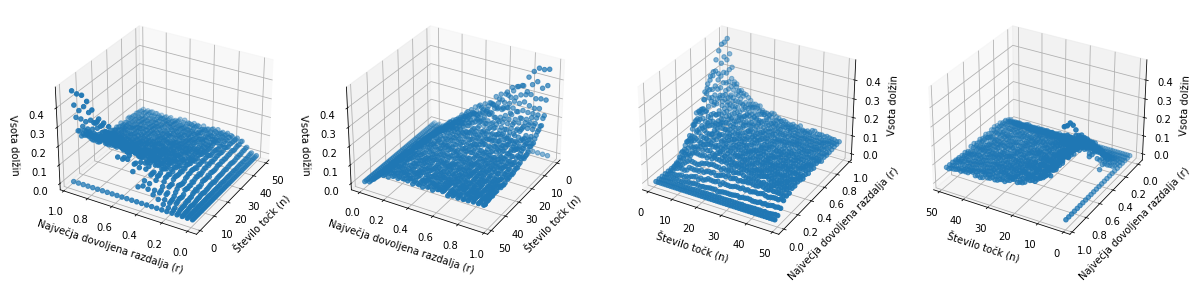

In [93]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

korak = 0.04

povp = []

# spreminjamo število točk in kličemo zgornjo funkcijo
for i in range(100):
    # definiramo prazne sezname - to bodo koordinate točk
    nji = []
    maxiji = []
    dolzineji = []
    for n in range(1, 50):
        
        # izračunamo dolžine
        
        maxi, dolzine = najkrajsa_pot_razdalja(n, 0, 1, korak)
        
        nji += [n for i in range(int(1/korak))]
        maxiji += maxi
        dolzineji += dolzine
    
    povp.append(dolzineji)
    
povp = [sum(izracun)/len(izracun) for izracun in zip(*povp)] 
    
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(20)

# s pomočjo funkcije subplot narišemo grafa enega ob drugem

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.view_init(30, 210)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.view_init(30, 30)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.view_init(30, 300)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.view_init(30, 120)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

## Procent bližnjih vozlišč

Izberemo naključno vozlišče in gledamo, s kakšnim procentom ostalih vozlišč si 
je blizu ob spreminjajočih parametrih.

In [35]:
def procent_bliznjih_tocke(max_st_tock, max_razdalja): 
    """
    Spreminjamo število točk in opazujemo procent bližnjih
    """
    tocke = []
    procenti = []
    
    for i in range(1, max_st_tock):
        a = Kvadrat(i, max_razdalja)
        tocke.append(i)
        
        #izberemo opazovano točko
        opazovana = a.tocke[0]
        povezane = a.bliznje().get(opazovana)
        
        procenti.append(len(povezane) / len(a.tocke))
        
    return tocke, procenti

CPU times: user 9.63 s, sys: 24.4 ms, total: 9.65 s
Wall time: 9.68 s


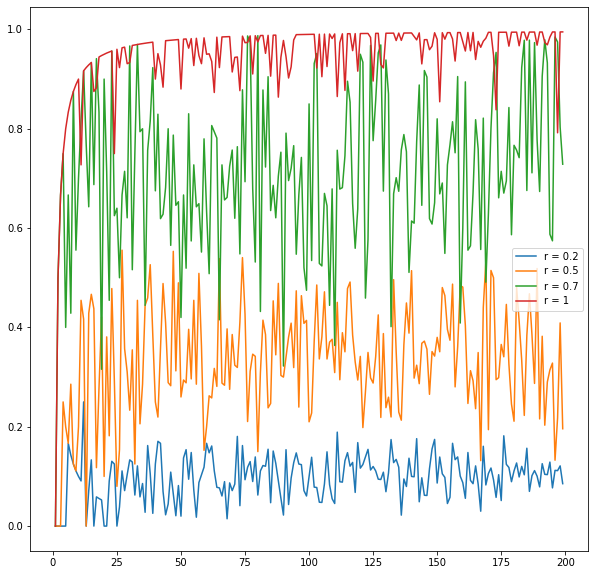

In [36]:
%%time

tocke1, dolzine1 = procent_bliznjih_tocke(200, 0.2)
tocke2, dolzine2 = procent_bliznjih_tocke(200, 0.4)
tocke3, dolzine3 = procent_bliznjih_tocke(200, 0.7)
tocke4, dolzine4 = procent_bliznjih_tocke(200, 1)

plt.plot(tocke1, dolzine1, label='r = 0.2');
plt.plot(tocke2, dolzine2, label='r = 0.5');
plt.plot(tocke3, dolzine3, label='r = 0.7');
plt.plot(tocke4, dolzine4, label='r = 1');
plt.legend();

CPU times: user 2min 29s, sys: 638 ms, total: 2min 30s
Wall time: 2min 31s


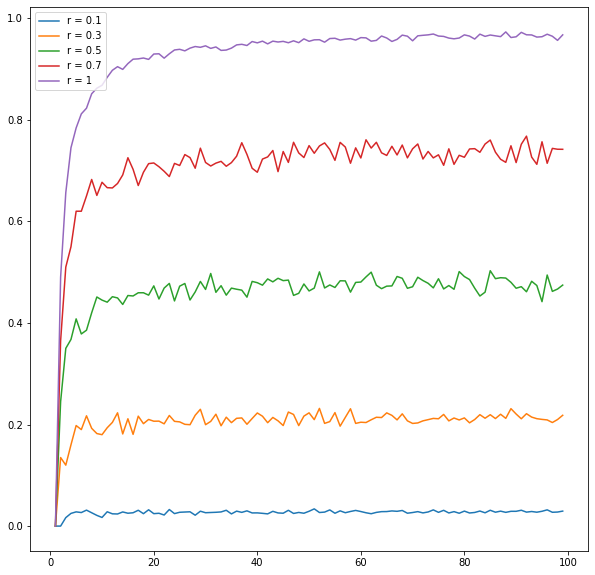

In [37]:
%%time

# v zgornjih izračunih smo opazili veliko šuma, zato ponovimo izračun 
# večkrat in povprečimo.

povp0 = []
povp1 = []
povp2 = []
povp3 = []
povp4 = []

for i in range(100):
    tocke0, procenti0 = procent_bliznjih_tocke(100, 0.1)
    tocke1, procenti1 = procent_bliznjih_tocke(100, 0.3)
    tocke2, procenti2 = procent_bliznjih_tocke(100, 0.5)
    tocke3, procenti3 = procent_bliznjih_tocke(100, 0.7)
    tocke4, procenti4 = procent_bliznjih_tocke(100, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(procenti0)
    povp1.append(procenti1)
    povp2.append(procenti2)
    povp3.append(procenti3)
    povp4.append(procenti4)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  
povp4 = [sum(izracun)/len(izracun) for izracun in zip(*povp4)] 

# narišemo
plt.plot(tocke0, povp0, label='r = 0.1');
plt.plot(tocke1, povp1, label='r = 0.3');
plt.plot(tocke2, povp2, label='r = 0.5');
plt.plot(tocke3, povp3, label='r = 0.7');
plt.plot(tocke4, povp4, label='r = 1');
plt.legend();

In [58]:
def procent_bliznjih_razdalja(st_tock, min_razdalja=0.1, max_razdalja=0.9, korak=0.005):
    """
    Spreminjamo r in opazujemo procent bližnjih točk.
    """
    maxi = []
    procenti = []
    
    trenutna = min_razdalja
    while trenutna <= max_razdalja:
        a = Kvadrat(st_tock, trenutna)
        maxi.append(trenutna)
        
        # izbrana točka
        opazovana = a.tocke[0]
        povezane = a.bliznje().get(opazovana)
        
        # računanje deleža
        procenti.append(len(povezane) / len(a.tocke))
        
        trenutna += korak
        
    return maxi, procenti

CPU times: user 12.6 s, sys: 29 ms, total: 12.7 s
Wall time: 12.7 s


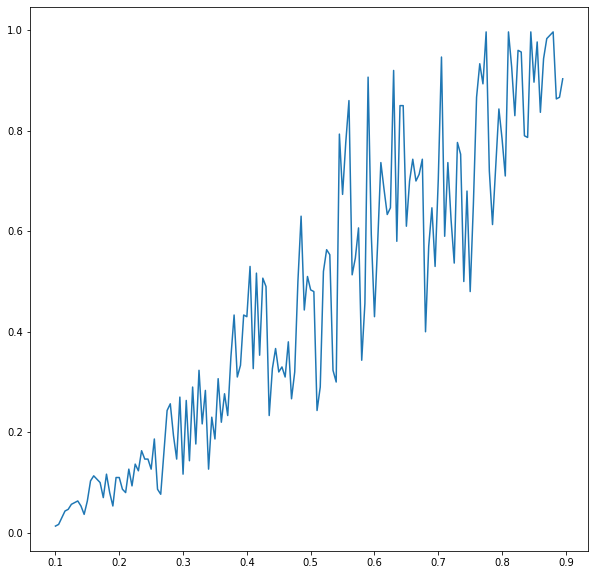

In [59]:
%%time

maxi, procenti = procent_bliznjih_razdalja(300, 0.1, 0.9)

plt.plot(maxi, procenti)

CPU times: user 7.45 s, sys: 18.1 ms, total: 7.46 s
Wall time: 7.48 s


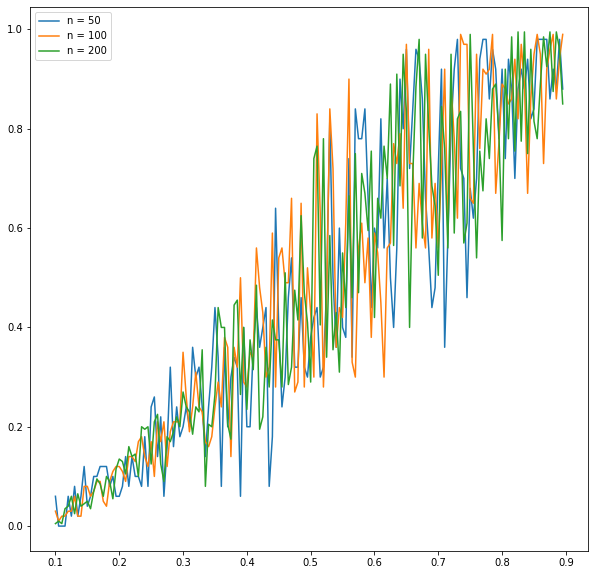

In [60]:
%%time

maxi1, dolzine1 = procent_bliznjih_razdalja(50)
maxi2, dolzine2 = procent_bliznjih_razdalja(100)
maxi3, dolzine3 = procent_bliznjih_razdalja(200)

plt.plot(maxi1, dolzine1, label='n = 50');
plt.plot(maxi2, dolzine2, label='n = 100');
plt.plot(maxi3, dolzine3, label='n = 200');
plt.legend();

CPU times: user 15min 49s, sys: 2.29 s, total: 15min 51s
Wall time: 15min 54s


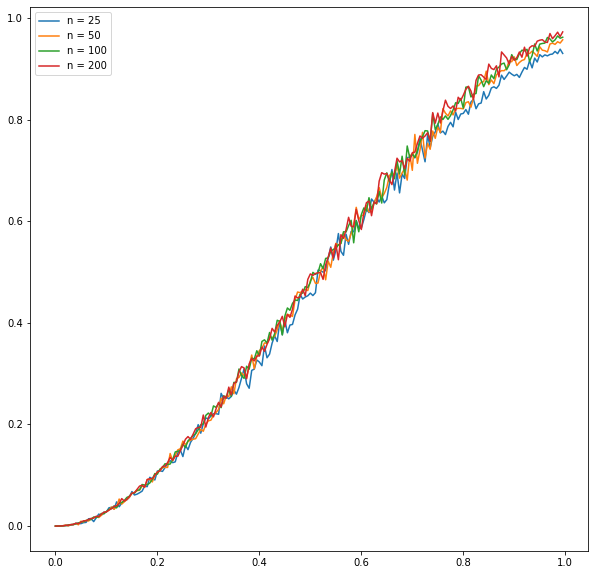

In [65]:
%%time

# v zgornjih izračunih smo opazili veliko šuma, zato ponovimo izračun 
# večkrat in povprečimo.

povp0 = []
povp1 = []
povp2 = []
povp3 = []

for i in range(100):
    tocke0, procenti0 = procent_bliznjih_razdalja(25, 0, 1)
    tocke1, procenti1 = procent_bliznjih_razdalja(50, 0, 1)
    tocke2, procenti2 = procent_bliznjih_razdalja(100, 0, 1)
    tocke3, procenti3 = procent_bliznjih_razdalja(200, 0, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(procenti0)
    povp1.append(procenti1)
    povp2.append(procenti2)
    povp3.append(procenti3)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  

# narišemo
plt.plot(tocke0, povp0, label='n = 25');
plt.plot(tocke1, povp1, label='n = 50');
plt.plot(tocke2, povp2, label='n = 100');
plt.plot(tocke3, povp3, label='n = 200');
plt.legend();

CPU times: user 57.7 s, sys: 139 ms, total: 57.9 s
Wall time: 58 s


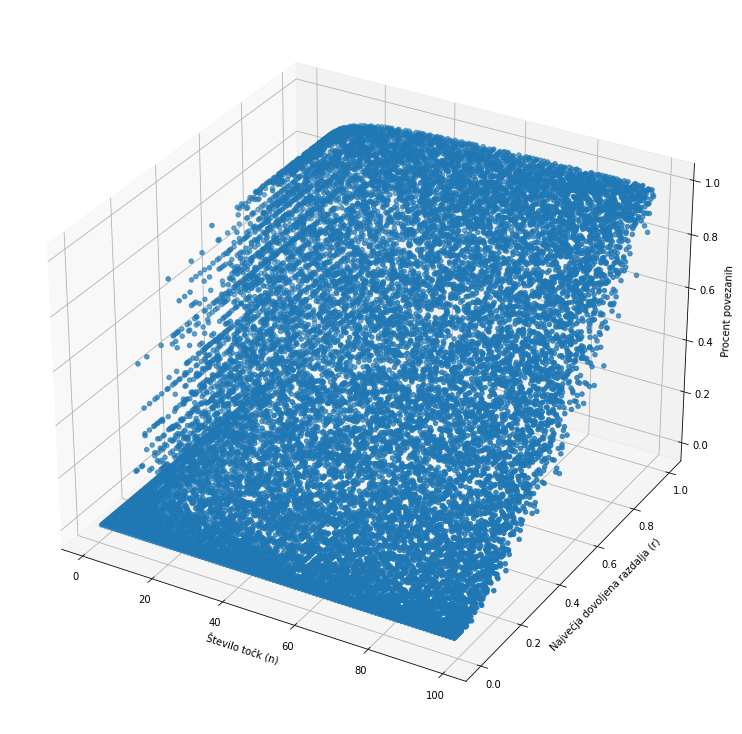

In [62]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

# definiramo prazne sezname - to bodo koordinate točk
nji = []
maxiji = []
procentiji = []
korak = 0.005

# spreminjamo število točk in kličemo zgornjo funkcijo
for n in range(1, 100):
    
    # izračunamo dolžine
    
    maxi, procenti = procent_bliznjih_razdalja(n, 0, 1, korak)
    
    nji += [n for i in range(int(1/korak))]
    maxiji += maxi
    procentiji += procenti
    
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Procent povezanih')


ax.scatter(nji, maxiji, procentiji);

CPU times: user 1min 32s, sys: 415 ms, total: 1min 32s
Wall time: 1min 32s


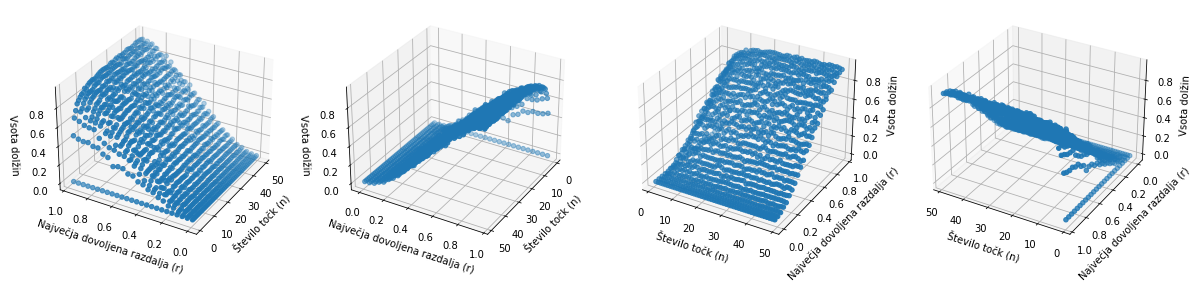

In [94]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

korak = 0.04

povp = []

# spreminjamo število točk in kličemo zgornjo funkcijo
for i in range(100):
    # definiramo prazne sezname - to bodo koordinate točk
    nji = []
    maxiji = []
    dolzineji = []
    for n in range(1, 50):
        
        # izračunamo dolžine
        
        maxi, dolzine = procent_bliznjih_razdalja(n, 0, 1, korak)
        
        nji += [n for i in range(int(1/korak))]
        maxiji += maxi
        dolzineji += dolzine
        
    povp.append(dolzineji)
    
povp = [sum(izracun)/len(izracun) for izracun in zip(*povp)] 
    
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(20)

# s pomočjo funkcije subplot narišemo grafa enega ob drugem

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.view_init(30, 210)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.view_init(30, 30)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.view_init(30, 300)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.view_init(30, 120)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

## Procent povezanih vozlišč

Izberemo naključno vozlišče in gledamo, s kakšnim procentom ostalih vozlišč je 
to vozlišče povezano

In [44]:
def procent_povezanih_tocke(max_st_tock, max_razdalja): 
    """
    Spreminjamo število točk in opazujemo procent povezanih od naključno izbrane.
    """
    tocke = []
    procenti = []
    
    for i in range(1, max_st_tock):
        a = Kvadrat(i, max_razdalja)
        tocke.append(i)
        
        # Dijkstra
        oddaljenost, _ = a.drevo_najkrajsih_poti()
        
        # samo tiste, ki so dejansko povezane
        povezane = [t for t in oddaljenost if oddaljenost[t] < 1000000]
        
        procenti.append(len(povezane) / len(a.tocke))
        
    return tocke, procenti

CPU times: user 23.9 s, sys: 54 ms, total: 24 s
Wall time: 24 s


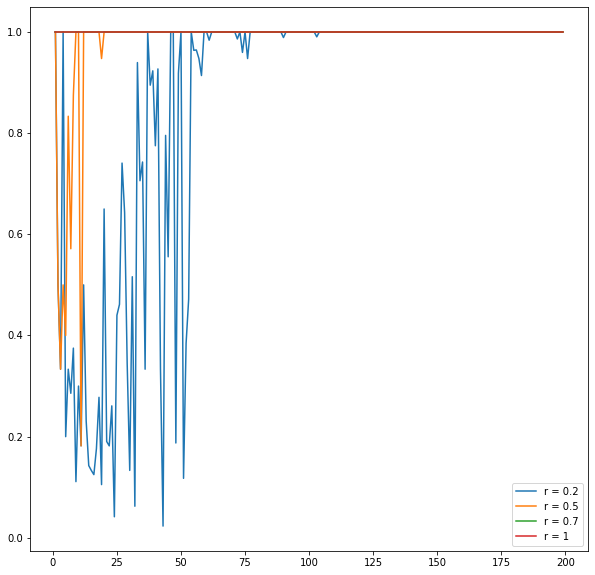

In [45]:
%%time

tocke1, dolzine1 = procent_povezanih_tocke(200, 0.2)
tocke2, dolzine2 = procent_povezanih_tocke(200, 0.4)
tocke3, dolzine3 = procent_povezanih_tocke(200, 0.7)
tocke4, dolzine4 = procent_povezanih_tocke(200, 1)

plt.plot(tocke1, dolzine1, label='r = 0.2');
plt.plot(tocke2, dolzine2, label='r = 0.5');
plt.plot(tocke3, dolzine3, label='r = 0.7');
plt.plot(tocke4, dolzine4, label='r = 1');
plt.legend();

CPU times: user 5min 57s, sys: 955 ms, total: 5min 58s
Wall time: 5min 59s


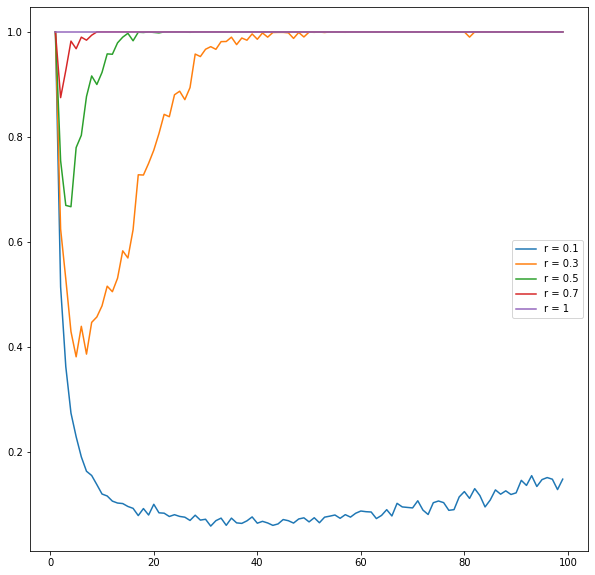

In [46]:
%%time

# v zgornjih izračunih smo opazili veliko šuma, zato ponovimo izračun 
# večkrat in povprečimo.

povp0 = []
povp1 = []
povp2 = []
povp3 = []
povp4 = []

for i in range(100):
    tocke0, procenti0 = procent_povezanih_tocke(100, 0.1)
    tocke1, procenti1 = procent_povezanih_tocke(100, 0.3)
    tocke2, procenti2 = procent_povezanih_tocke(100, 0.5)
    tocke3, procenti3 = procent_povezanih_tocke(100, 0.7)
    tocke4, procenti4 = procent_povezanih_tocke(100, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(procenti0)
    povp1.append(procenti1)
    povp2.append(procenti2)
    povp3.append(procenti3)
    povp4.append(procenti4)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  
povp4 = [sum(izracun)/len(izracun) for izracun in zip(*povp4)] 

# narišemo
plt.plot(tocke0, povp0, label='r = 0.1');
plt.plot(tocke1, povp1, label='r = 0.3');
plt.plot(tocke2, povp2, label='r = 0.5');
plt.plot(tocke3, povp3, label='r = 0.7');
plt.plot(tocke4, povp4, label='r = 1');
plt.legend();

In [47]:
def procent_povezanih_razdalja(st_tock, min_razdalja=0.1, max_razdalja=0.9, korak=0.005): 
    maxi = []
    procenti = []
    
    trenutna = min_razdalja
    while trenutna <= max_razdalja:
        a = Kvadrat(st_tock, trenutna)
        maxi.append(trenutna)
        
        oddaljenost, _ = a.drevo_najkrajsih_poti()
        
        povezane = [t for t in oddaljenost if oddaljenost[t] < 1000000]
        
        procenti.append(len(povezane) / len(a.tocke))
        
        trenutna += korak
        
    return maxi, procenti

CPU times: user 18.4 s, sys: 39.1 ms, total: 18.4 s
Wall time: 18.5 s


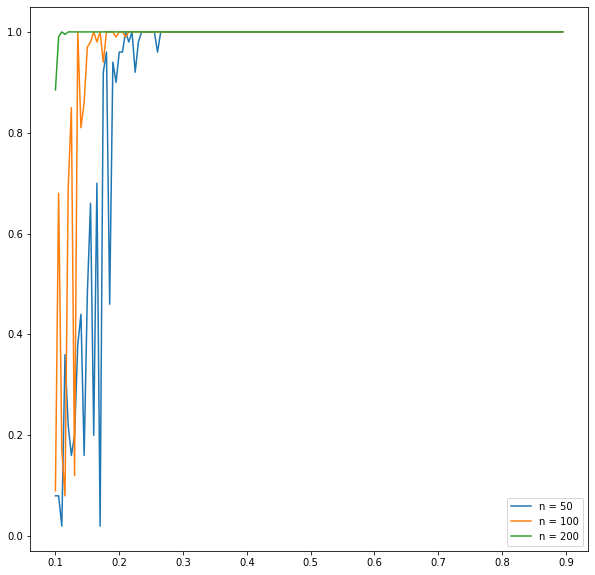

In [48]:
%%time

maxi1, dolzine1 = procent_povezanih_razdalja(50)
maxi2, dolzine2 = procent_povezanih_razdalja(100)
maxi3, dolzine3 = procent_povezanih_razdalja(200)

plt.plot(maxi1, dolzine1, label='n = 50');
plt.plot(maxi2, dolzine2, label='n = 100');
plt.plot(maxi3, dolzine3, label='n = 200');
plt.legend();

CPU times: user 39min 49s, sys: 9.62 s, total: 39min 59s
Wall time: 40min 11s


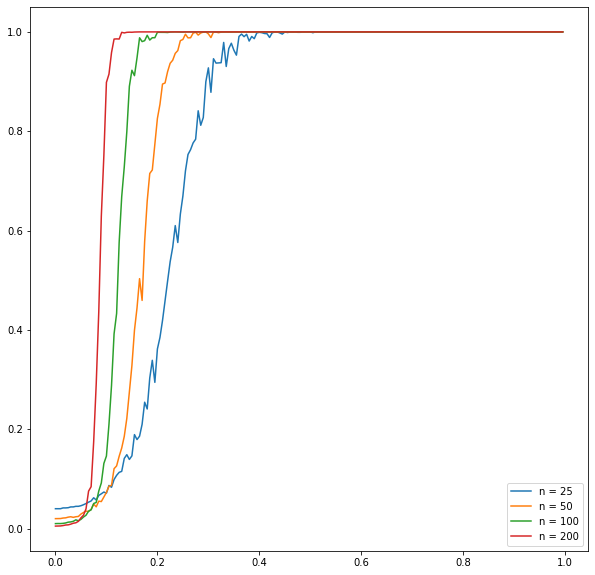

In [68]:
%%time

# v zgornjih izračunih smo opazili veliko šuma, zato ponovimo izračun 
# večkrat in povprečimo.

povp0 = []
povp1 = []
povp2 = []
povp3 = []

for i in range(100):
    tocke0, procenti0 = procent_povezanih_razdalja(25, 0, 1)
    tocke1, procenti1 = procent_povezanih_razdalja(50, 0, 1)
    tocke2, procenti2 = procent_povezanih_razdalja(100, 0, 1)
    tocke3, procenti3 = procent_povezanih_razdalja(200, 0, 1)
    
    # gradimo matriko vseh izračunov
    povp0.append(procenti0)
    povp1.append(procenti1)
    povp2.append(procenti2)
    povp3.append(procenti3)
    
# matriko povprečimo v en sam izračun
povp0 = [sum(izracun)/len(izracun) for izracun in zip(*povp0)] 
povp1 = [sum(izracun)/len(izracun) for izracun in zip(*povp1)] 
povp2 = [sum(izracun)/len(izracun) for izracun in zip(*povp2)]
povp3 = [sum(izracun)/len(izracun) for izracun in zip(*povp3)]  

# narišemo
plt.plot(tocke0, povp0, label='n = 25');
plt.plot(tocke1, povp1, label='n = 50');
plt.plot(tocke2, povp2, label='n = 100');
plt.plot(tocke3, povp3, label='n = 200');
plt.legend();

CPU times: user 1min 10s, sys: 185 ms, total: 1min 10s
Wall time: 1min 11s


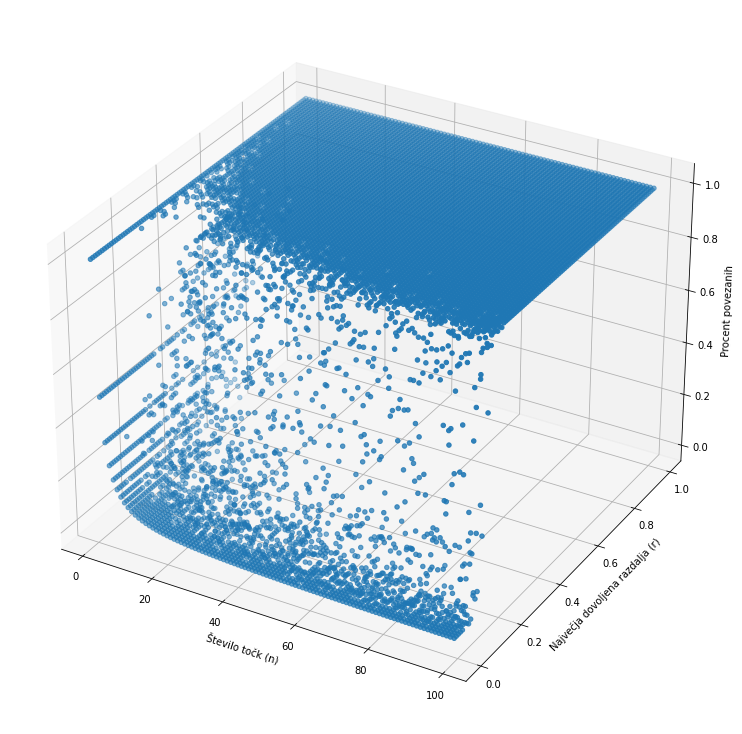

In [64]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

# definiramo prazne sezname - to bodo koordinate točk
nji = []
maxiji = []
procentiji = []
korak = 0.01

# spreminjamo število točk in kličemo zgornjo funkcijo
for n in range(1, 100):
    
    # izračunamo dolžine
    
    maxi, procenti = procent_povezanih_razdalja(n, 0, 1, korak)
    
    nji += [n for i in range(int(1/korak))]
    maxiji += maxi
    procentiji += procenti
    
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Procent povezanih')


ax.scatter(nji, maxiji, procentiji);

CPU times: user 3min 48s, sys: 856 ms, total: 3min 49s
Wall time: 3min 50s


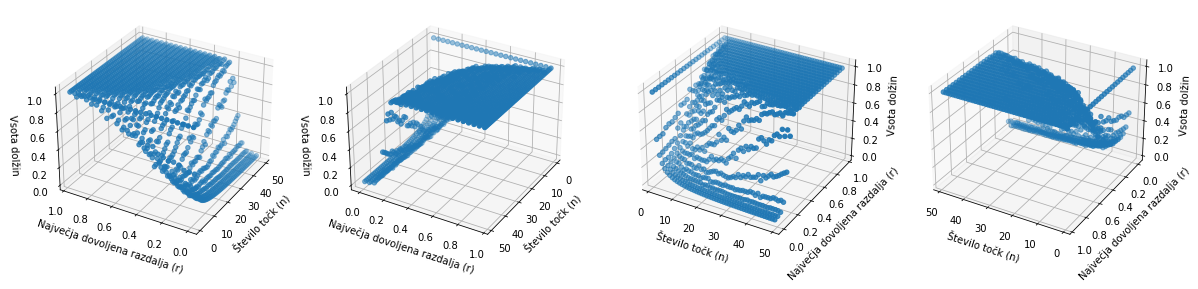

In [95]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

korak = 0.04

povp = []

# spreminjamo število točk in kličemo zgornjo funkcijo
for i in range(100):
    # definiramo prazne sezname - to bodo koordinate točk
    nji = []
    maxiji = []
    dolzineji = []
    for n in range(1, 50):
        
        # izračunamo dolžine
        
        maxi, dolzine = procent_povezanih_razdalja(n, 0, 1, korak)
        
        nji += [n for i in range(int(1/korak))]
        maxiji += maxi
        dolzineji += dolzine
        
    povp.append(dolzineji)
    
povp = [sum(izracun)/len(izracun) for izracun in zip(*povp)] 
    
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(20)

# s pomočjo funkcije subplot narišemo grafa enega ob drugem

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.view_init(30, 210)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.view_init(30, 30)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.view_init(30, 300)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.view_init(30, 120)
ax.set_xlabel('Število točk (n)')
ax.set_ylabel('Največja dovoljena razdalja (r)')
ax.set_zlabel('Vsota dolžin')
ax.scatter(nji, maxiji, povp);